Loading all the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing


Loading the data with proper column names

In [2]:
names = ['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','pressure measurement','crc rate','command response','time','binary result','categorized result','specific result' ]
df = pd.read_csv('C:/Users/userlocal/Desktop/PhD/Courses/Machine_Learning/IntrusionDetection/Datasets/gas_pipeline.csv',names=names,na_values='?',index_col=None)
#df = df.dropna()
#data=np.array(df)


print (df.head(6))


   address  function  length  setpoint   gain  reset rate  deadband  \
0        4         3      16       NaN    NaN         NaN       NaN   
1        4         3      46       NaN    NaN         NaN       NaN   
2        4        16      90      10.0  115.0         0.2       0.5   
3        4        16      16       NaN    NaN         NaN       NaN   
4        4         3      16       NaN    NaN         NaN       NaN   
5        4         3      46       NaN    NaN         NaN       NaN   

   cycle time  rate  system mode  control scheme  pump  solenoid  \
0         NaN   NaN          NaN             NaN   NaN       NaN   
1         NaN   NaN          NaN             NaN   NaN       NaN   
2         1.0   0.0          0.0             1.0   0.0       0.0   
3         NaN   NaN          NaN             NaN   NaN       NaN   
4         NaN   NaN          NaN             NaN   NaN       NaN   
5         NaN   NaN          NaN             NaN   NaN       NaN   

   pressure measurement  

Data Manipulation

In [3]:
df1=df.sort_values(by=['command response'])
cr_col=np.array(df1['command response'])
indices=np.where(cr_col==1)
splitter=indices[0][0]

df_res,df_com=df1.head(splitter),df1.tail(len(df1)-splitter)
#print (df_res.head(6))
#print (splitter)
df_temp=df_com[['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','crc rate','binary result','categorized result']].dropna()

df_temp1=df_temp[['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','crc rate']]
df_temp2=df_temp[['binary result','categorized result']]
input_com=np.array(df_temp1)
output_com=np.array(df_temp2)


df_temp=df_res[['address','function', 'length', 'pressure measurement','crc rate','binary result','categorized result']].dropna(axis=0, how='any')
#df_temp=df_temp.dropna(axis=0, how='any')

df_temp1=df_temp[['address','function', 'length', 'pressure measurement','crc rate']]
df_temp2=df_temp[['binary result','categorized result']]
input_res=np.array(df_temp1)
output_res=np.array(df_temp2)

#print (df_temp)
print (input_com.shape, output_com.shape, input_res.shape, output_res.shape)
#df_temp.isnull()

#input1=np.array(input)
#output=df[['binary result','categorized result']]
#print (input)

(64100, 14) (64100, 2) (68848, 5) (68848, 2)


Dividing Datasets

(32050, 14) (32050,)
Accuracy on training data = 0.807800312012
[0.80773790951638069, 0.80773790951638069, 0.80780031201248048, 0.80773790951638069, 0.80780031201248048]


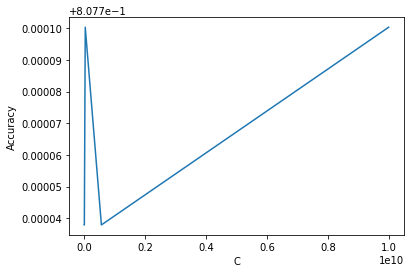

In [10]:


## Dividing the dataset for command type packets

ntr1 = int(input_com.shape[0]/2)
nts1 = input_com.shape[0]-ntr1
Xtr1 = input_com[:ntr1,:]
ytr1 = output_com[:ntr1,1]
Xts1 = input_com[:nts1,:]
yts1 = output_com[:nts1,1]
print (Xtr1.shape,ytr1.shape)

#Trying logistic regression
logreg = linear_model.LogisticRegression()
logreg.fit(Xtr1,ytr1)
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts1)
#print (input_com[0]==input_com[32051])
print("Accuracy on training data =", acc)
Cs=np.logspace(5,10,5)
acc_list=[]
for C_element in Cs:
    #print (C_element)
    logreg = linear_model.LogisticRegression(C=C_element)
    logreg.fit(Xtr1,ytr1)
    yhat = logreg.predict(Xts1)
    acc_list.append(np.mean(yhat == yts1))
print (acc_list)
plt.plot(Cs,acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [5]:
from sklearn import svm

# Create a classifier: a support vector classifier
svc = svm.SVC(probability=False, C=5, gamma=.09,verbose=10)
svc.fit(Xtr1,ytr1)

[LibSVM]

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

In [97]:
yhat_ts = svc.predict(Xts1)
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.988736
